ANALISIS INICIAL DE LOS DATOS.

Con la funcion info hacemos una modesta aproximacion a los datos del dataframe. Comprobamos que tenemos un total de 16 atributos, cada una con 24k entradas. Destaca el hecho de que para todos los atributos, ninguna entrada tiene valor nulo. Vemos una columna tipo que contiene datos tipo object. Al venir de un csv, sabemos que ha de ser texto (a parte de que el atributo es song_name). Teniendo esto en cuenta, el preprocesamiento que habría que hacerle a este conjunto es mínimo.

Usamos la funcion describe para ver un resumen estadístico de los datos. Información como la desviación estándar o los percentiles podrían resultar de ayuda más adelante.

In [19]:
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

song_pop = pd.read_csv("train_ap1_mcp_23_24_train.csv")

song_pop.info()
song_pop.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         24000 non-null  object 
 1   song_id           24000 non-null  int64  
 2   popularity        24000 non-null  int64  
 3   acousticness      24000 non-null  float64
 4   danceability      24000 non-null  float64
 5   song_duration_ms  24000 non-null  int64  
 6   energy            24000 non-null  float64
 7   instrumentalness  24000 non-null  float64
 8   key               24000 non-null  int64  
 9   liveness          24000 non-null  float64
 10  loudness          24000 non-null  float64
 11  audio_mode        24000 non-null  int64  
 12  speechiness       24000 non-null  float64
 13  tempo             24000 non-null  float64
 14  time_signature    24000 non-null  int64  
 15  audio_valence     24000 non-null  float64
dtypes: float64(9), int64(6), object(1)
memor

,song_id,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,500840.366625,41.082417,0.370186,0.552322,2.358258e+05,0.569191,0.149253,5.330167,0.214456,-9.596249,0.347625,0.121792,117.645065,2.897083,0.452112
std,288296.975063,18.109720,0.356401,0.186490,1.275362e+05,0.264864,0.303700,3.461212,0.197887,6.038361,0.476226,0.188332,30.925825,0.397699,0.259177
min,18.000000,0.000000,0.000001,0.059000,1.721300e+04,0.000263,0.000000,0.000000,0.015200,-47.499000,0.000000,0.022500,34.856000,0.000000,0.000000
25%,251669.500000,29.000000,0.036700,0.433000,1.830998e+05,0.381000,0.000000,3.000000,0.097000,-11.848250,0.000000,0.036700,92.938000,3.000000,0.235000
50%,500290.000000,43.000000,0.233000,0.570000,2.208930e+05,0.601000,0.000041,5.000000,0.128000,-7.818000,0.000000,0.050000,115.636000,3.000000,0.443000
75%,752274.750000,55.000000,0.728000,0.689000,2.668218e+05,0.787000,0.036500,8.000000,0.264000,-5.500000,1.000000,0.107000,139.162250,3.000000,0.655000
max,999979.000000,99.000000,0.996000,0.980000,5.552917e+06,0.999000,0.993000,11.000000,0.996000,1.342000,1.000000,0.965000,236.735000,4.000000,1.000000


Para terminar con esta primera aproximación a la muestra, podemos ver un histograma de las variables númericas que nos aportará información interesante. Por ejemplo, en base a sus histogramas, podemos afirmar que presumiblememnte atributos como "acousticness", "song_duration_ms" o "instrumentalness" no aportarán mucha información al modelo a la hora de producir predicciones de popularidad, puesto que son muestras muy sesgadas, de mucha frecuencia en muy pocos valores.

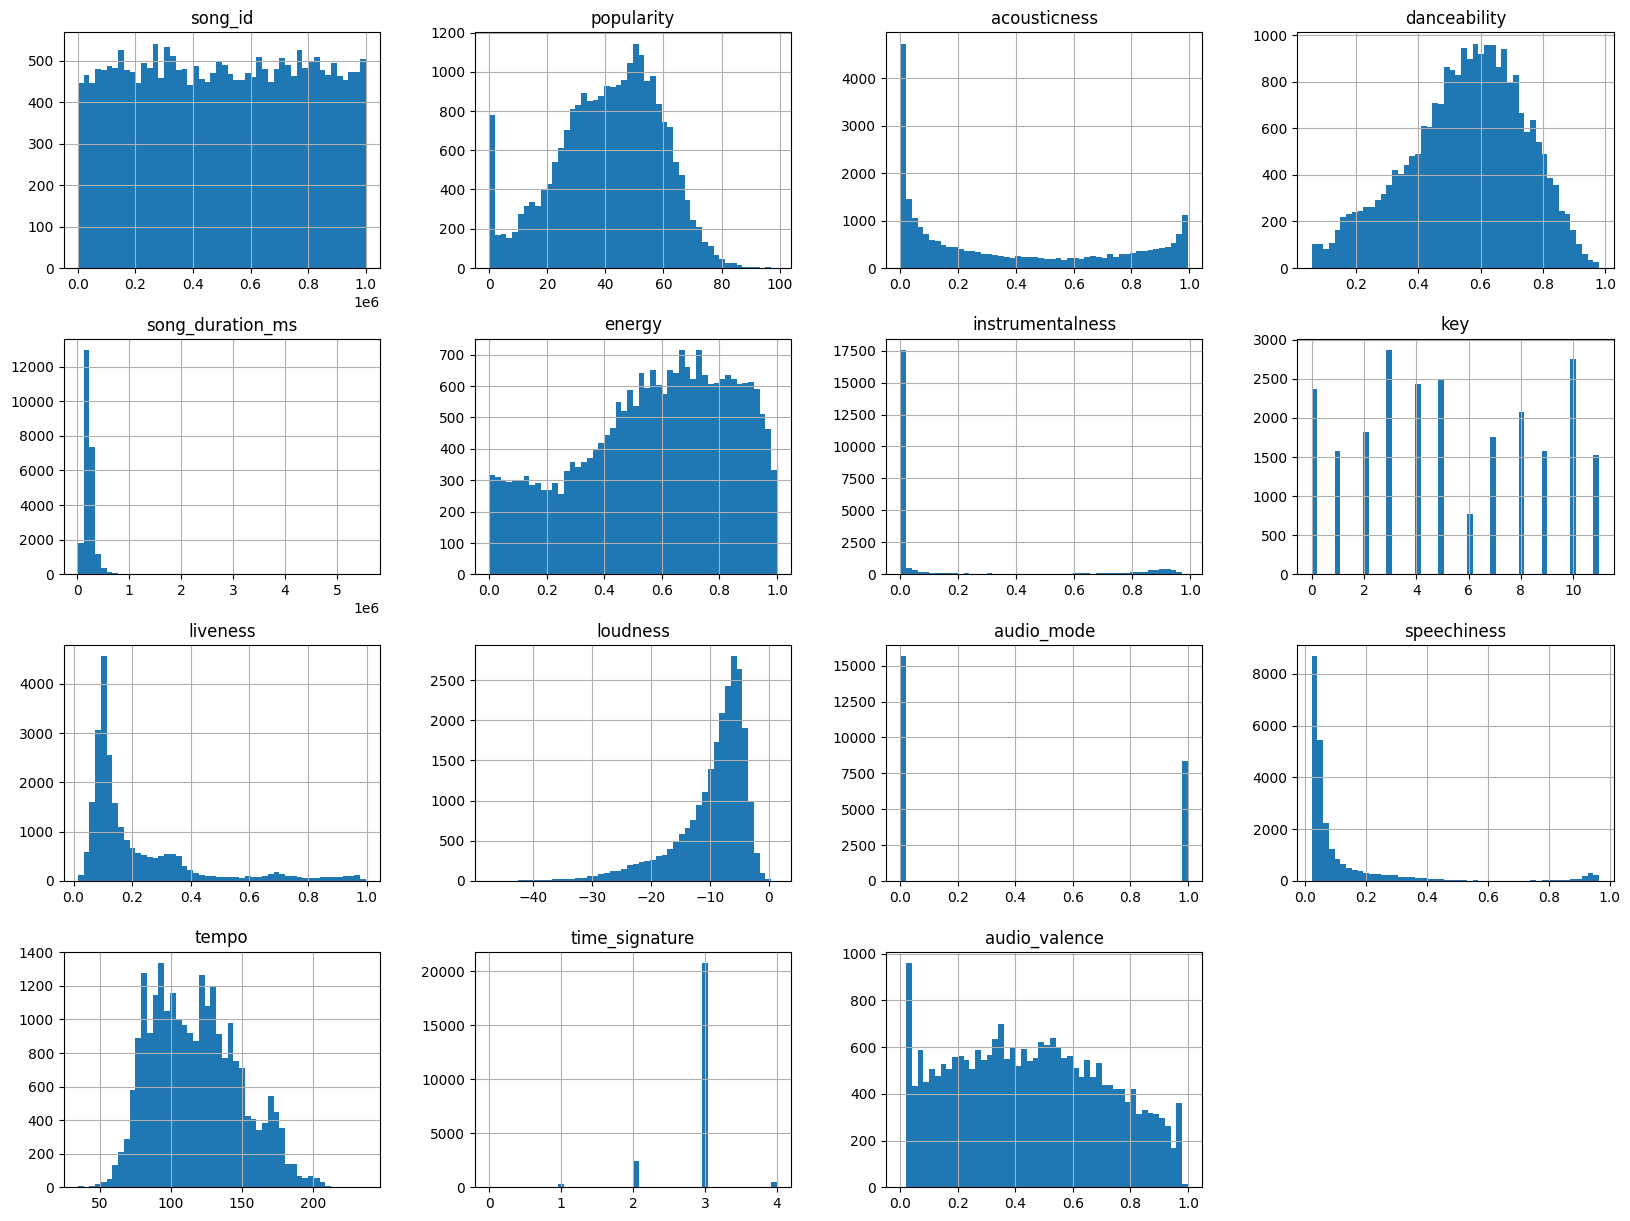

In [20]:
song_pop.hist(bins=50, figsize=(20,15))
plt.show()

PREPROCESAMIENTO

Realizamos una copia del df original para modificar este. Guardamos la variable independiente y la eliminamos de la muestra para entrenar el modelo. Borramos también song_name, puesto que es un valor númerico y es representado igualmente con el atributo sonng_id

In [21]:
Y = np.array(song_pop["popularity"])#Guardamos la variable dependiente.
train_song = song_pop #Copia del df original para operar con él.

del train_song["popularity"]
del train_song["song_name"]


ACONDICIONAMIENTO DE DATOS

Para trabajar con el conjunto, haremos una división en train and test para entrenar y comprobar el modelo. La finalidad de partir el dataframe correspondiente a train de nuevo en train y test es afinar y asegurar un adecuamiento correcto del modelo antes de que este vea los datos del dataframe test. De esta manera ponemos trabas a que el modelo presente overfitting a la muestra.

Para hacer la partición, escogemos una división estratificada. El objetivo, dado que intenaremos que nuestro modelo predizca lo mejor posible la popularidad, es que los dos conjuntos train y test del dataframe tengan una distribución similar de una variable, en este caso danceabilty. 

¿Por qué danceability? Si observamos el histograma correspondiente a dicho atributo, veremos que, si tomamos 5 estratos (del 0 al 0.2, del 0.2 al 0.4 etc) hay una clara tendencia al 3 estrato. Al mismo tiempo, a priorí y por lógica, parece prudente asumir una relación estrecha entre la popularidad de una canción y su danzabilidad, por lo que es preciso asegurarnos de que no se incurre en ningun sesgo muestral con esta variable. En la celda abajo localizada podemos observar el histograma de la variable danceability estratificad para mayor comodidad. Vemos tres colores en representación de los tres conjuntos de datos: strat_test, strat_train y original. Podemos observar como se consigue una distribución similar.

Si usaramos una división aleatoria, podría ocurrir que entrenasemos nuestro modelo con unos datos de danceability sesgados en los estratos 3 y 4, haciendo que al probar el modelo con el conjunto test vieramos una gran diferencia debido a dicho sesgo.


        "It is important to havea sufficient number of instances in your dataset for each stratum,
        or else the estimate of a stratum’s importance may be biased. This means that 
        you should not have too many strata, and each stratum should be large enough." 
                Aurélien Génon - Hands-On Machine Learning.

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 4447 to 14050
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   song_id            4800 non-null   int64   
 1   acousticness       4800 non-null   float64 
 2   danceability       4800 non-null   float64 
 3   song_duration_ms   4800 non-null   int64   
 4   energy             4800 non-null   float64 
 5   instrumentalness   4800 non-null   float64 
 6   key                4800 non-null   int64   
 7   liveness           4800 non-null   float64 
 8   loudness           4800 non-null   float64 
 9   audio_mode         4800 non-null   int64   
 10  speechiness        4800 non-null   float64 
 11  tempo              4800 non-null   float64 
 12  time_signature     4800 non-null   int64   
 13  audio_valence      4800 non-null   float64 
 14  danceabilty_strat  4800 non-null   category
dtypes: category(1), float64(9), int64(5)
memory usage: 567.4

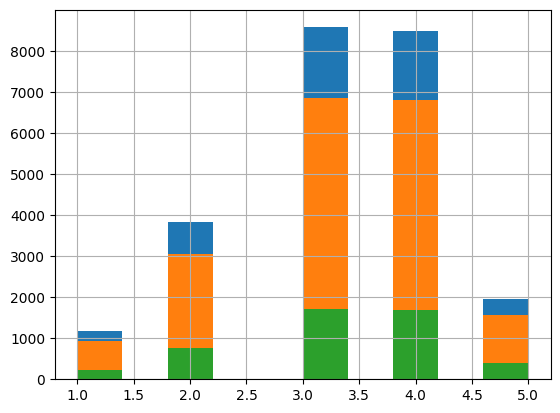

In [47]:
train_song["dance_strat"] = pd.cut(train_song["danceability"],
 bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
 labels=[1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_song, train_song["dance_strat"]):
 strat_train_set = train_song.loc[train_index]
 strat_test_set = train_song.loc[test_index]

from sklearn.model_selection import train_test_split as tss
Y_train_list, Y_test_list = tss(Y, test_size = 0.2, random_state = 42)

Y_train_list = np.array(Y_train_list).reshape(-1,1)
Y_test_list = np.array(Y_test_list).reshape(-1, 1)


train_song["dance_strat"].hist()
strat_train_set["dance_strat"].hist()
strat_test_set["dance_strat"].hist()

for set_ in (strat_train_set, strat_test_set):
 set_.drop("dance_strat", axis=1, inplace=True) #Puesto que ya hemos hecho la estratificación, eliminamos la columna del df 
                                                #para dejarlo como antes

strat_test_set.info()


ENTRENAMIENTO.

Haremos un primer aproximamiento con un modelo de regresión lineal.

'audio_valence'

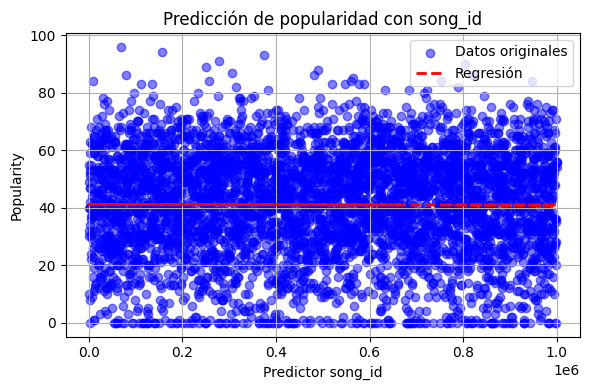

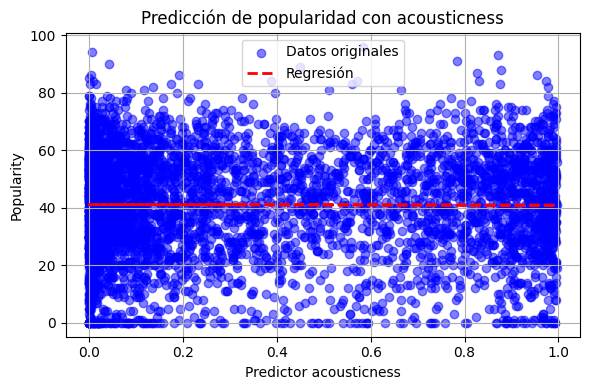

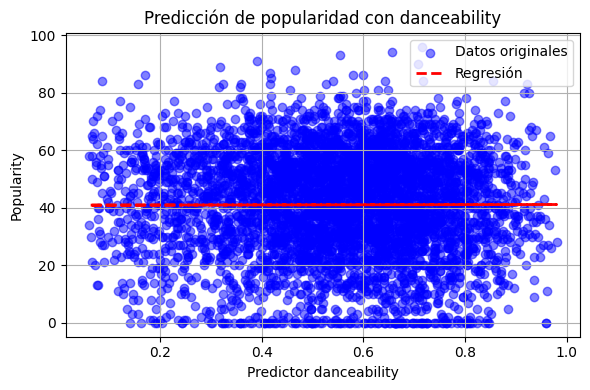

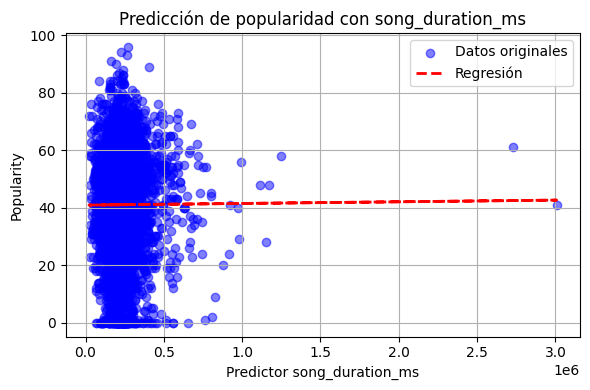

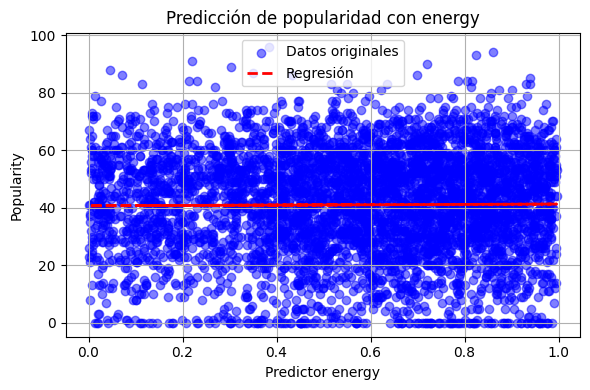

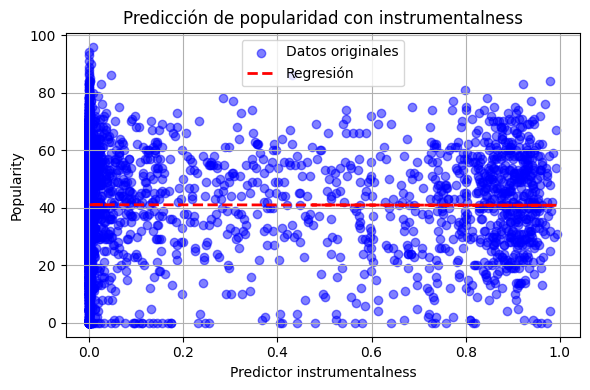

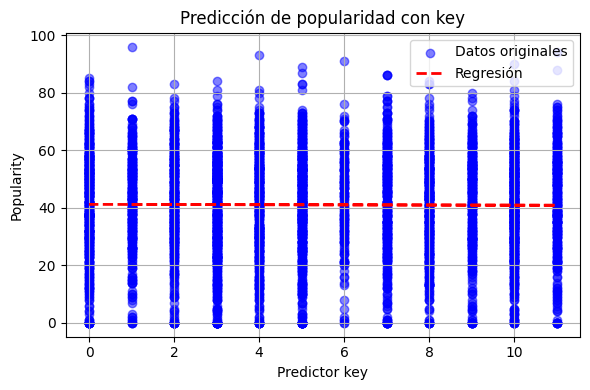

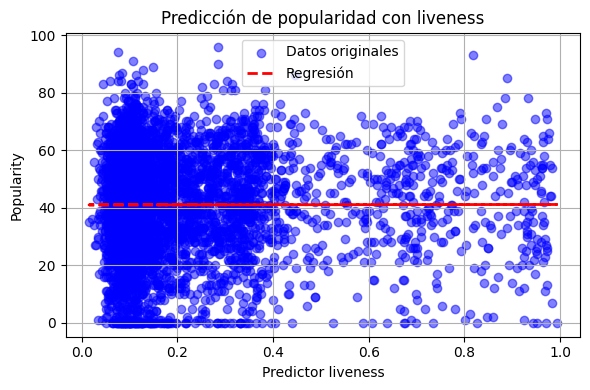

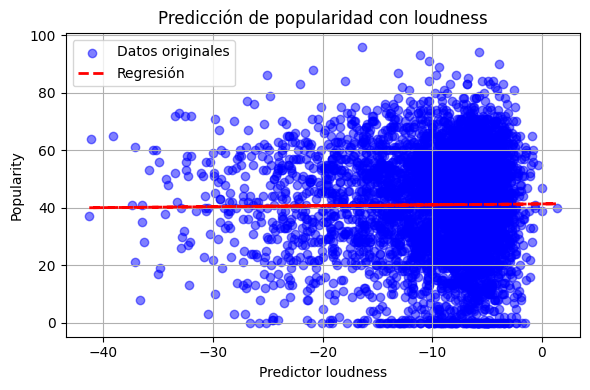

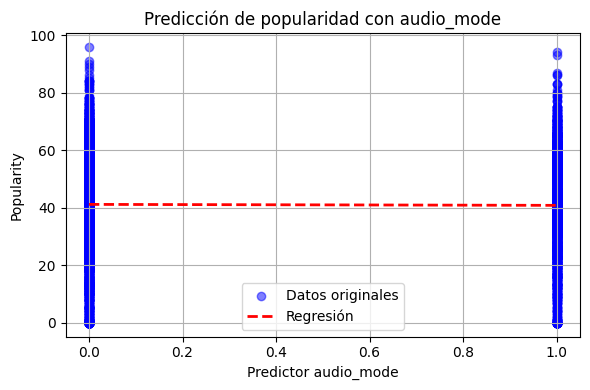

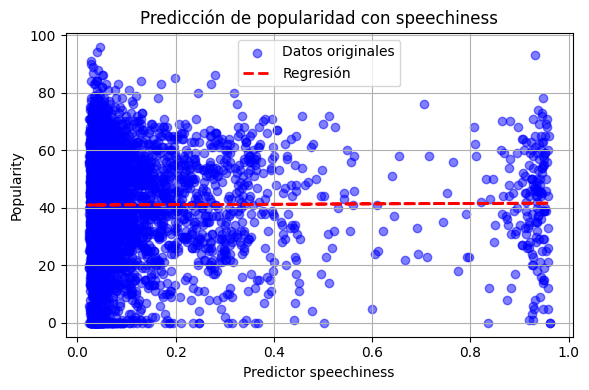

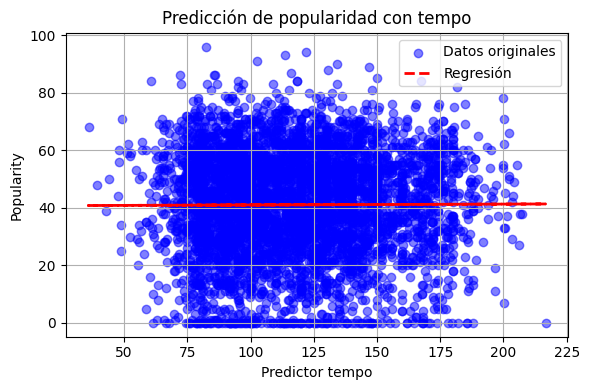

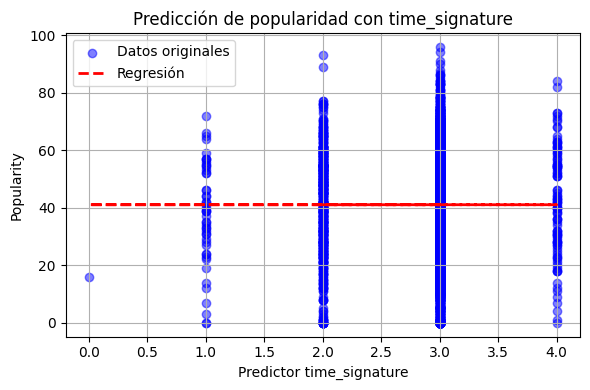

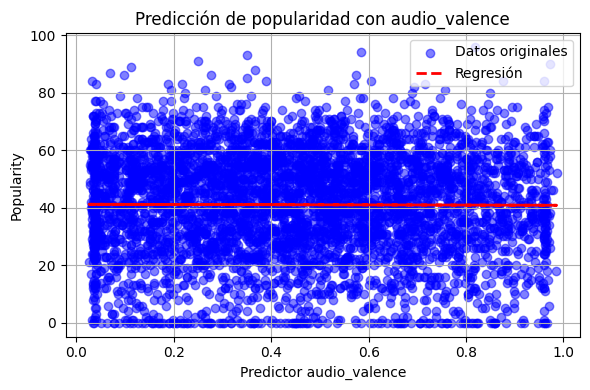

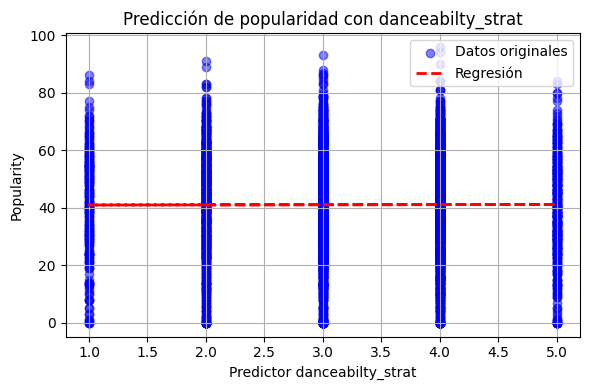

In [48]:
model = LinearRegression()

def bestPredictorColumn():
    bestError = np.inf  
    bestColumn = None 
    for columna in strat_train_set:
        x_tr = np.array(strat_train_set[columna]).reshape(-1,1)
        x_ts = np.array(strat_test_set[columna]).reshape(-1,1)
        model.fit(x_tr, Y_train_list)
        prediction_test = model.predict(x_ts)
        plt.figure(figsize=(6, 4))
        plt.scatter(x_ts, Y_test_list, label='Datos originales', color='blue', marker='o', alpha=0.5)
        # Línea de regresión
        plt.plot(x_ts, prediction_test, label='Regresión', linestyle='--', color='red', linewidth=2)

        plt.title("Predicción de popularidad con "+columna)
        plt.xlabel("Predictor " + columna)
        plt.ylabel("Popularity")
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        currentError = mean_squared_error(Y_test_list, prediction_test)
        if currentError <= bestError:
            bestError = currentError
            bestColumn = columna
        
    return bestColumn

bestPredictorColumn()